## Preparação dos dados

Carreguar o dataset fornecido (simulado ou pequeno dataset público, ex: Telco Customer Churn).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, roc_curve, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
import numpy as np


In [2]:
df = pd.read_csv("data.csv")

# Show first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* Realizar a limpeza de dados, tratando valores ausentes e inconsistências.


In [3]:
# Verificando as informações iniciais 
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Convertendo colunas de strings para numéricas
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [5]:
# Verificando valores nulos depois da conversão
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
# Removendo os valores nulos
df = df.dropna()

In [7]:
# Padronizando valores para apenas "No"
df["MultipleLines"] = df["MultipleLines"].replace("No phone service", "No")


In [8]:
# Padronizando valores para apenas "No"

cols_services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                 "TechSupport", "StreamingTV", "StreamingMovies"]
for col in cols_services:
    df[col] = df[col].replace("No internet service", "No")



In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Executar engenharia de features básicas (ex: one-hot encoding para variáveis categóricas).

In [11]:
# Identificando colunas categóricas - removendo a coluna target 
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols.remove("Churn")  

# Aplicando one-hot enconding 
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Convertendo a coluna targert para dados binários
df_encoded["Churn"] = df_encoded["Churn"].map({"No": 0, "Yes": 1})



In [12]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [13]:
df_encoded.shape

(7032, 7055)

## Modelagem Preditiva

Dividir os dados em conjuntos de treino e teste.

In [14]:
# Separando os dados entre as features e o target 
X = df_encoded.drop("Churn", axis=1)   # Features
y = df_encoded["Churn"]                # Target

# Dividindo os dados para teste e treino
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Verificando dados antes do treino
print("Tamanho do treino:", X_train.shape)
print("Tamanho do teste:", X_test.shape)
print("Proporção de churn no treino:", y_train.mean())
print("Proporção de churn no teste:", y_test.mean())

Tamanho do treino: (5625, 7054)
Tamanho do teste: (1407, 7054)
Proporção de churn no treino: 0.2657777777777778
Proporção de churn no teste: 0.2658137882018479


Treinar um modelo de classificação (ex: Regressão Logística, Random Forest, Gradient Boosting) para prever o churn. E avaliar o desempenho do modelo usando métricas apropriadas (ex: Acurácia, Precisão, Recall, F-Score, AUC-ROC).

In [15]:
# Modelos escolhidos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}





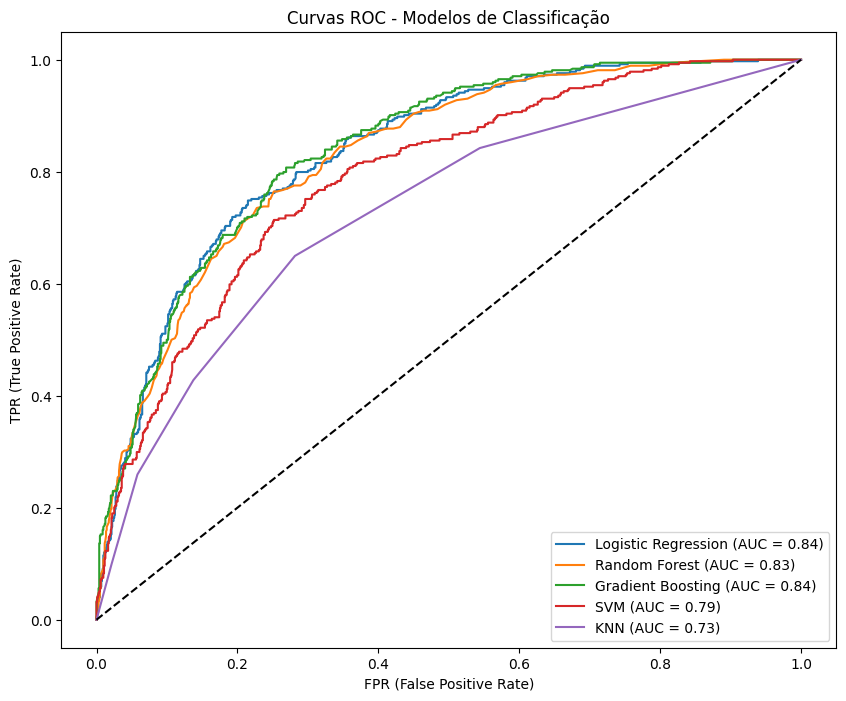

In [16]:
# Armazena os resultados
results = {}
plt.figure(figsize=(10, 8))

# Treinamento dos modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob)
    }

        # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")


# Curvas ROC
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.title("Curvas ROC - Modelos de Classificação")
plt.legend()
plt.show()


In [17]:
# Resultados 
results_df = pd.DataFrame(results).T
print("\n===== Métricas de desempenho =====\n")
print(results_df)




===== Métricas de desempenho =====

                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.803838   0.648485  0.572193  0.607955  0.836737
Random Forest        0.788202   0.639706  0.465241  0.538700  0.829232
Gradient Boosting    0.793888   0.646853  0.494652  0.560606  0.840791
SVM                  0.734186   0.000000  0.000000  0.000000  0.789684
KNN                  0.746979   0.529801  0.427807  0.473373  0.728324


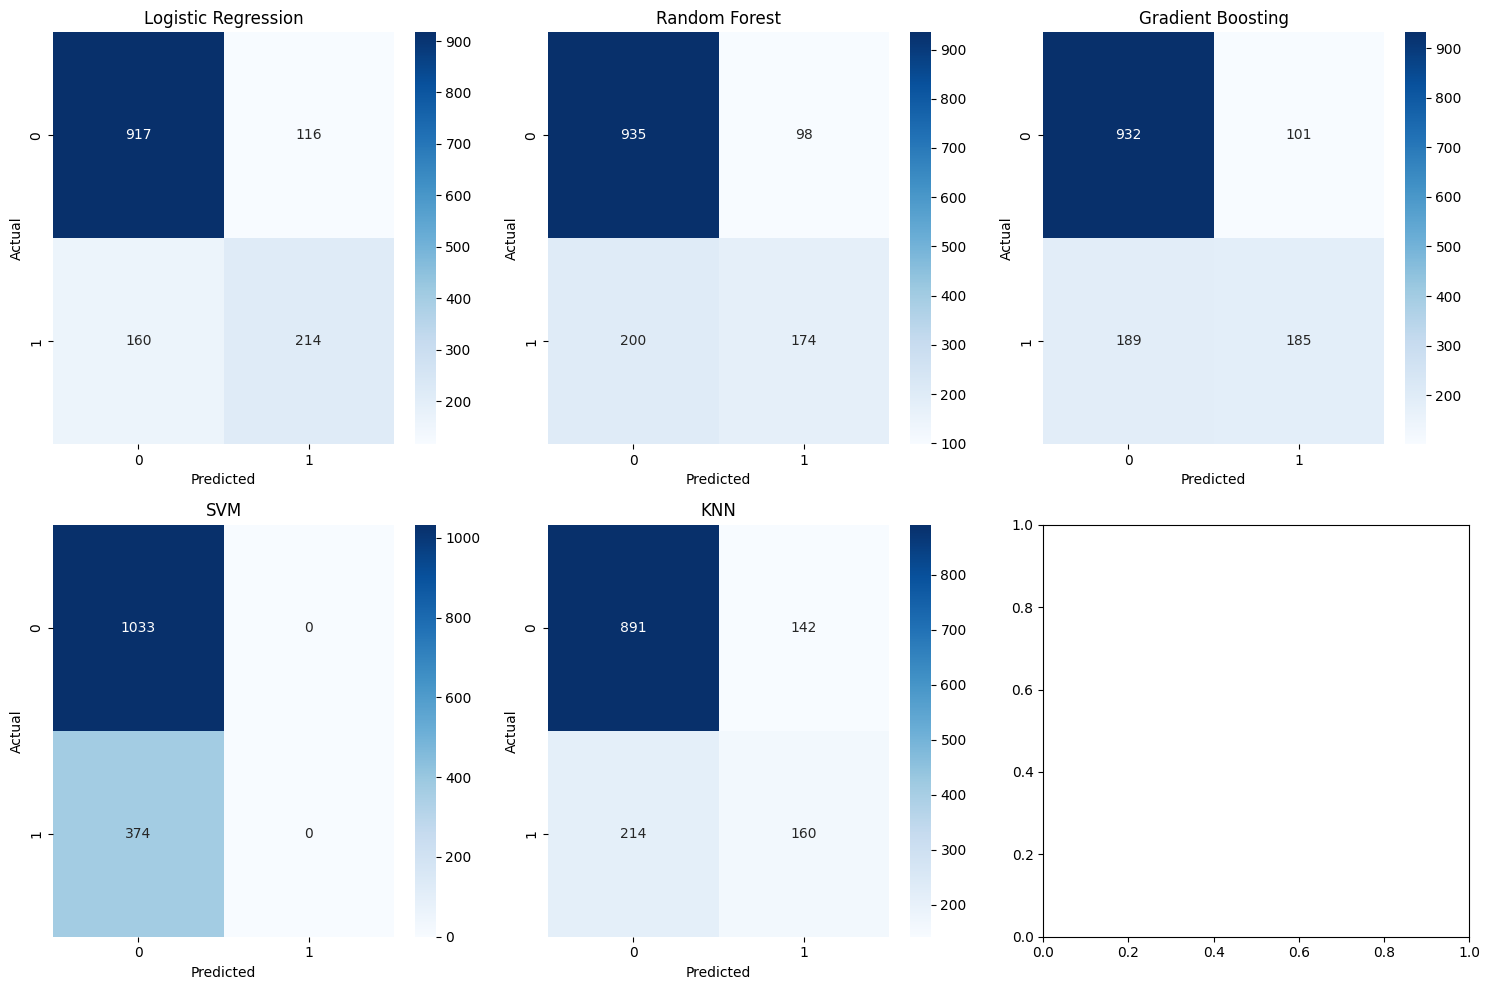

In [18]:
# Matrizes de confusão
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

## Análise e Comunicação

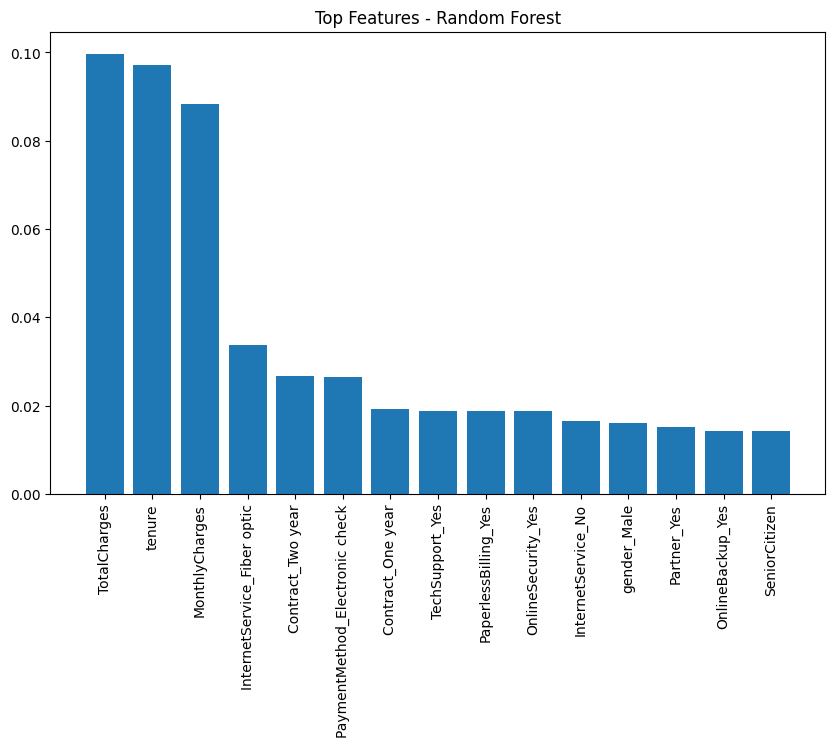

In [19]:
# Analizando Importância das features -> Random Florest 
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 15  # mostrar apenas as 15 principais variáveis

plt.figure(figsize=(10, 6))
plt.title("Top Features - Random Forest")
plt.bar(range(top_n), importances[indices][:top_n], align="center")
plt.xticks(range(top_n), X_train.columns[indices][:top_n], rotation=90)
plt.show()




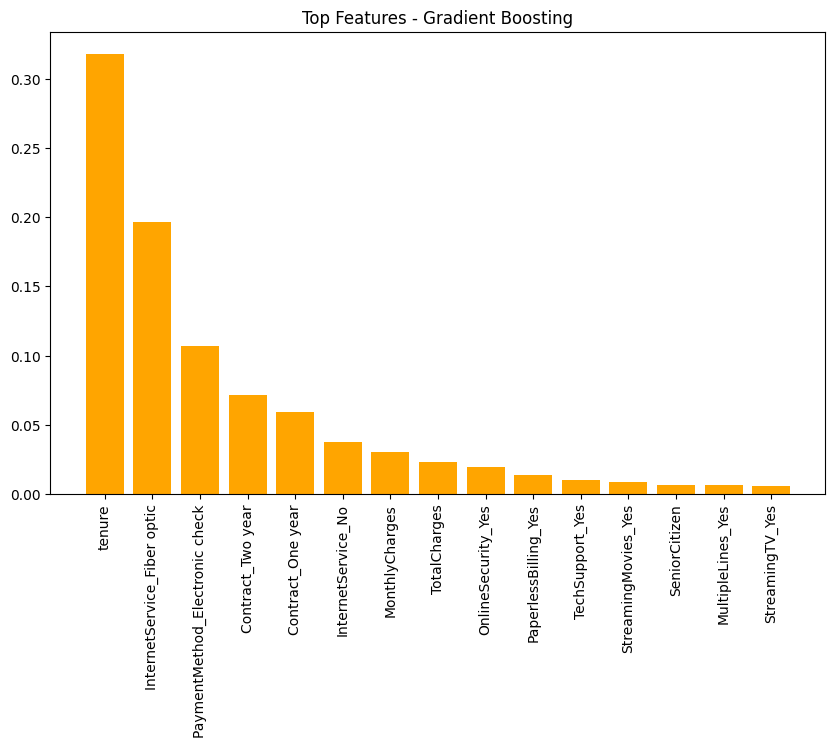

In [20]:
# Analizando Importância das features -> Gradiant Boosting 
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top Features - Gradient Boosting")
plt.bar(range(top_n), importances_gb[indices_gb][:top_n], align="center", color="orange")
plt.xticks(range(top_n), X_train.columns[indices_gb][:top_n], rotation=90)
plt.show()



In [21]:
# Analizando Importância das features -> Regressão Logística 

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

coefficients = log_reg.coef_[0]
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

print("\nCoeficientes mais positivos (aumentam churn):")
print(coef_df.head(10))

print("\nCoeficientes mais negativos (reduzem churn):")
print(coef_df.tail(10))


Coeficientes mais positivos (aumentam churn):
                          Feature  Coefficient
7040  InternetService_Fiber optic     1.150654
4474        customerID_6323-AYBRX     0.536956
411         customerID_0607-DAAHE     0.536669
2450        customerID_3512-IZIKN     0.535298
4624        customerID_6532-YLWSI     0.534645
711         customerID_1043-YCUTE     0.534110
6086        customerID_8631-NBHFZ     0.533725
6391        customerID_9063-ZGTUY     0.532435
5222        customerID_7359-SSBJK     0.532246
6047        customerID_8580-QVLOC     0.532007

Coeficientes mais negativos (reduzem churn):
                                    Feature  Coefficient
2320                  customerID_3320-VEOYC    -0.425030
4497                  customerID_6350-XFYGW    -0.426544
3461                  customerID_4912-PIGUY    -0.427089
5788                  customerID_8161-QYMTT    -0.427201
4699                  customerID_6630-UJZMY    -0.431475
1747                  customerID_2545-EBUPK    -